# Worked Examples for EDA

This page contains a few worked examples for exploratory data analysis of a single numeric variable.

## 1. EDA for MPG Column in mtcars Data Frame

Let's gather than standard descriptives, 5-number summary and information about outliers as we begin.
- The [descriptive statstics code](https://straightdraw.github.io/probstat/S0b.html) can be found at this link.
- The [outliers code](https://straightdraw.github.io/probstat/A2e.html) can be found at this link.

The **mtcars** data frame is found in native R, so we can load it. Then we will begin.

In [1]:
miles <- mtcars$mpg

### Descriptive Statistics for MPG

In [2]:
cat('The standard descriptives for the mtcars MPG data:\n   Mean = ', round(mean(miles),2),
    '\n   Standard Deviation = ', round(sd(miles),2),
    '\n   Sample Size = ', length(miles),
    '\n\nThe 5-number summary for SLEEEP')
summary(miles)

The standard descriptives for the mtcars MPG data:
   Mean =  20.09 
   Standard Deviation =  6.03 
   Sample Size =  32 

The 5-number summary for SLEEEP

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.40   15.43   19.20   20.09   22.80   33.90 

**Anlaysis.** We notice that $|\text{mean}-\text{median}|=0.89>0.603$. Since the difference between the mean and the median is greater than a tenth of a standard deviation, we expect skew and outliers to right.

### Outliers for MPG

In [3]:
cat('Outliers for the MPG data using the 2 standard deviation rule:\n   ',sum(miles > mean(miles) + 2 * sd(miles)), 
    ' to the right, and','\n   ', sum(miles < mean(miles) - 2 * sd(miles)) , ' to the left.\n\n')

Q1 <- quantile(miles)[["25%"]] ; Q3 <- quantile(miles)[["75%"]] ; IQR <- Q3 - Q1

cat('Outliers for the MPG data using the Box Plot method:\n   ',sum(miles > Q3 + 1.5 * IQR), 
    ' to the right, and','\n   ', sum(miles < Q1 - 1.5 * IQR) , ' to the left.')

Outliers for the MPG data using the 2 standard deviation rule:
    2  to the right, and 
    0  to the left.



Outliers for the MPG data using the Box Plot method:
    1  to the right, and 
    0  to the left.

**Analysis.** Our suspicions of outliers to the right was confirmed with our calculations showing either one or two outliers to the right and none to the left.

### Shape of MGP Data

Let's look at both a histogram and density plot. We can combine the 2 visualizations into a single plot, and the [information about how to do so is linked here](https://straightdraw.github.io/probstat/A2d.html).

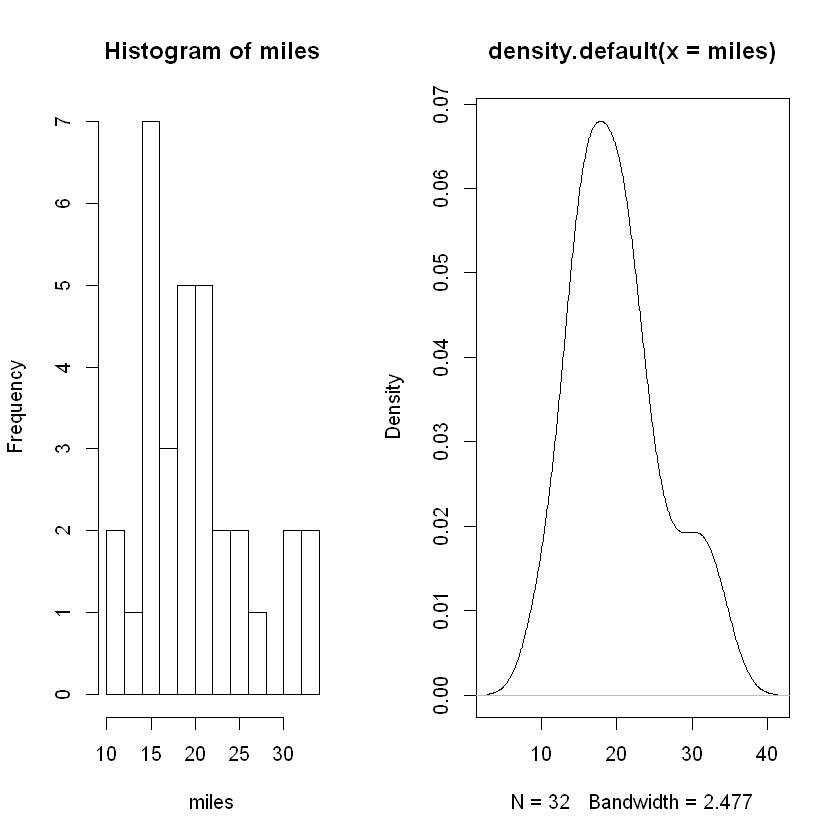

In [4]:
layout(matrix(c(1,2), ncol = 2), lcm(8))
    hist(miles, breaks = 15)
plt <- {
    plot(density(miles))
 }

**Analysis.** While the histogram shows somme evidence of the data being drawing from a bell-shaped distribution, the density plot shows more clearly an approximately normal distribution with a slight skew to the right.

### Box Plot

Finally, let's construct a box plot to confirm all the work above.

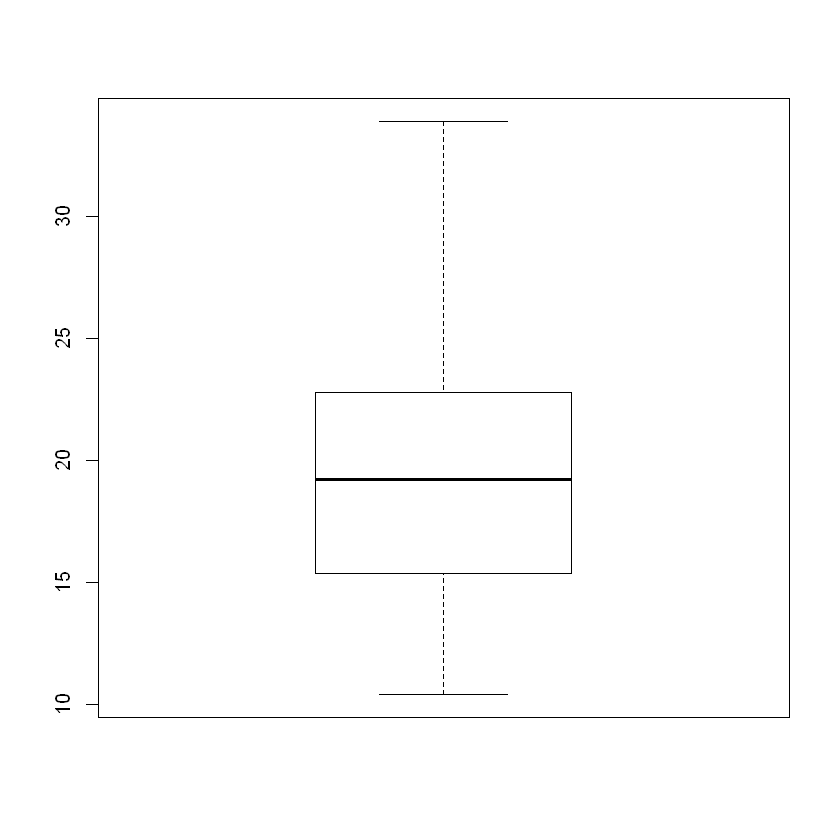

In [5]:
boxplot(miles)

### Overall Analsyis

First, note that the boxplot and quantile function differ on whether an outlier exists to the right in the box plot. This is not problematic.

We can see overall that **the distribution is approximately normal with some skew to the right**. Numerically, we identified 1-2 outliers to the right, yet the box plot shows no outliers as explained above.

## 2. EDA for Births Data

Let's investigate a bit first as this data set was intended to track health outcomes when comparing moms who smoked during pregnancy with those who did not. We can generate side-by-side boxplots using a statistical formula of the form $y \sim A$ where $y$ is a numeric variable and $A$ is a grouping variable. R understands this formula, so we have the following code:

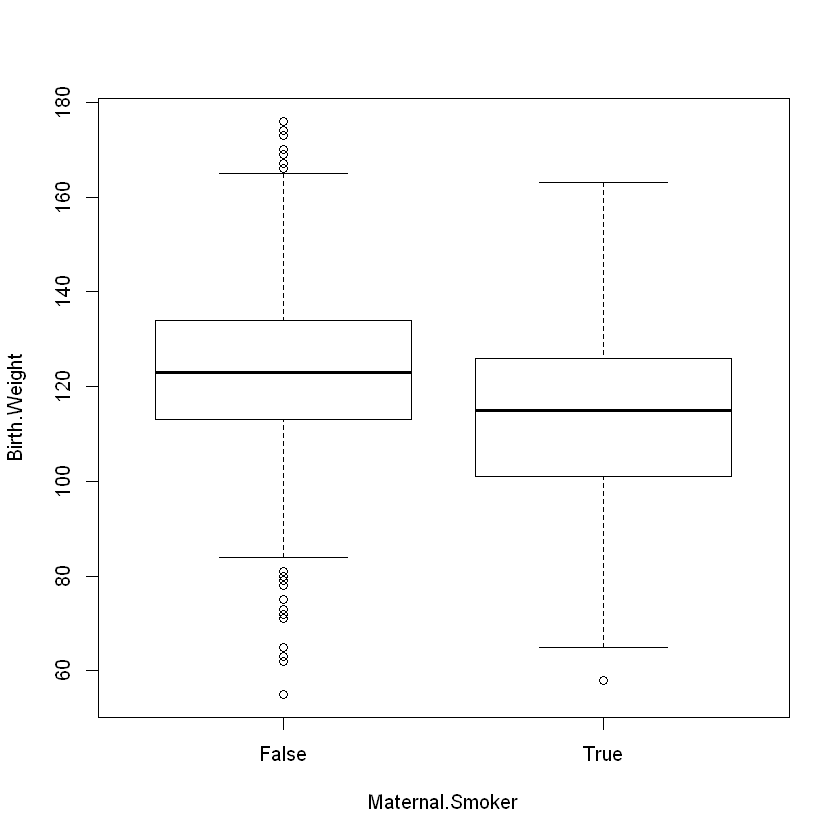

In [6]:
births <- read.csv('https://faculty.ung.edu/rsinn/data/baby.csv')
boxplot(Birth.Weight ~ Maternal.Smoker, data = births)

## 2a. EDA for Babies Born to Non-smoking Moms

While birth weight may be an imperfect proxy for the health of the baby, it tracks most closely with the outcomes we wish to analyze. The subsetting is provided below so that we have the data needed stored in the variable **nosmoke**. The units are ounces.

In [7]:
nosmoke_temp <- subset(births, Maternal.Smoker == 'False')
nosmoke <- nosmoke_temp$Birth.Weight
head(nosmoke,5)

[1] 120 113 136 138 132

In [8]:
cat('The standard descriptives for the Birth Weight data for Non-smoking Moms:\n   Mean = ', round(mean(nosmoke),2),
    '\n   Standard Deviation = ', round(sd(nosmoke),2),
    '\n   Sample Size = ', length(nosmoke),
    '\n\nThe 5-number summary for Birth Weight:')
summary(nosmoke)

The standard descriptives for the Birth Weight data for Non-smoking Moms:
   Mean =  123.09 
   Standard Deviation =  17.42 
   Sample Size =  715 

The 5-number summary for Birth Weight:

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   55.0   113.0   123.0   123.1   134.0   176.0 

**Analysis.** The mean and median are nearly identical, so we expect either (a) no outliers or (b) a balancing of outliers. Balanced outliers occur when roughly the same number of outliers appear above and below the mean. The distance from Q1 to the minimum is longer than the distance from Q3 to the max, so a bit of left skew may be present.

In [9]:
cat('Outliers for the Birth Weight for Non-smoking Moms data using the 2 standard deviation rule:\n   ',sum(nosmoke > mean(nosmoke) + 2 * sd(nosmoke)), 
    ' to the right, and','\n   ', sum(nosmoke < mean(nosmoke) - 2 * sd(nosmoke)) , ' to the left.\n\n')

Q1 <- quantile(nosmoke)[["25%"]] ; Q3 <- quantile(nosmoke)[["75%"]] ; IQR <- Q3 - Q1

cat('Outliers for the Birth Weight for Non-smoking Moms using the Box Plot method:\n   ',sum(nosmoke > Q3 + 1.5 * IQR), 
    ' to the right, and','\n   ', sum(nosmoke < Q1 - 1.5 * IQR) , ' to the left.')

Outliers for the Birth Weight for Non-smoking Moms data using the 2 standard deviation rule:
    22  to the right, and 
    22  to the left.



Outliers for the Birth Weight for Non-smoking Moms using the Box Plot method:
    9  to the right, and 
    13  to the left.

**Analysis.** The outliers appear to be roughly balanced though the Blox Plot method shoes a few more outliers to the left than to the right.

### Shape of **nosmoke** Data

Again, we will plot both the histogram and density plot.

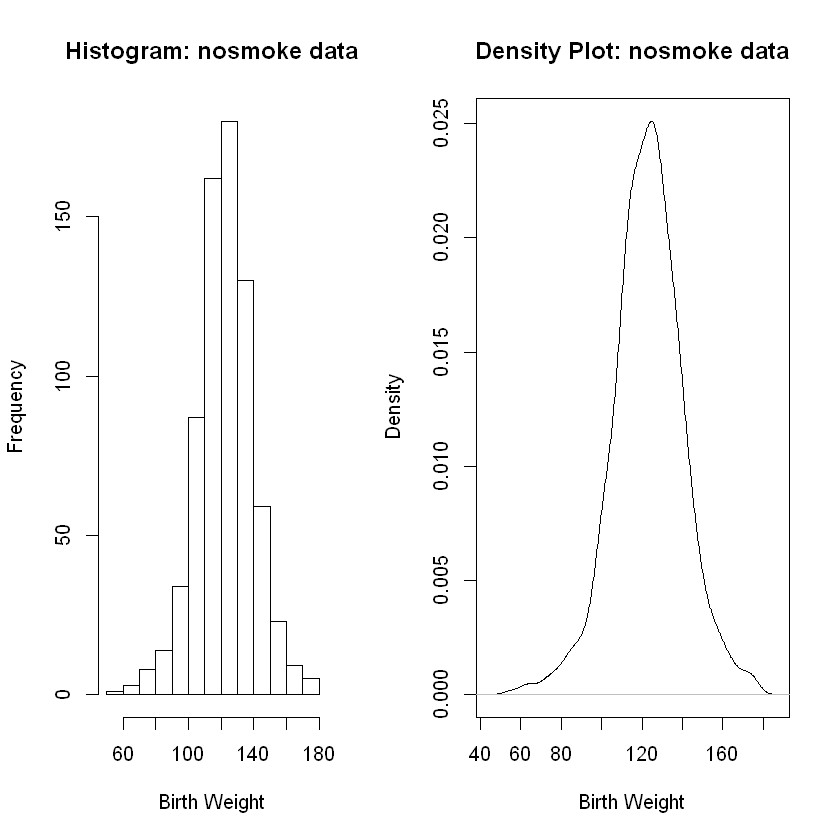

In [10]:
layout(matrix(c(1,2), ncol = 2), lcm(8))
    hist(nosmoke, main = 'Histogram: nosmoke data', xlab = 'Birth Weight')
plt <- {
    plot(density(nosmoke), main = 'Density Plot: nosmoke data', xlab = 'Birth Weight')
 }

**Analisys.** Both the histogram and the density plot show an approximately normal (bell-shaped) distribution. Both also show some skew to the left. The skew to the left is not massive, yet it is noticeable. The slight skew to the left aligns with the outliers we found which, while mostly balanced, did tilt a bit to the left.

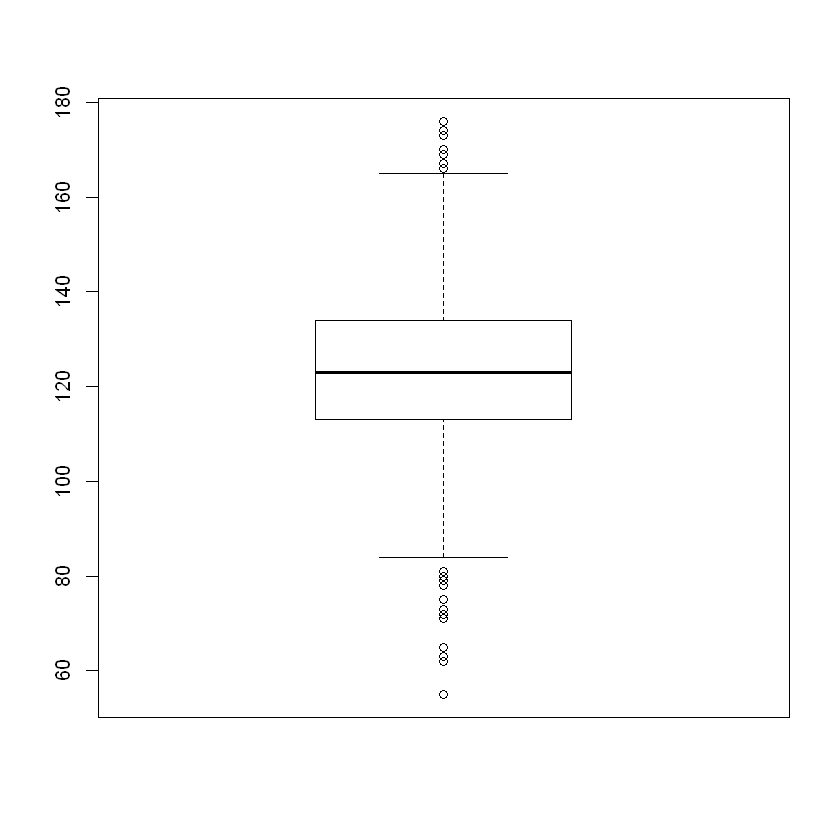

In [11]:
boxplot(nosmoke)

### Overall Analysis of Birth Weight Data for Babies of Non-smoking Moms

The approximately normal distribution is clear from both the histogram and density plot. There is a slight skew to the left confirmed in the box plot. While outliers exist both above and below the mean, there a few more outliers to the left. Also, several of the outliers to left are more extreme (further away from the median) than on the right.

**These data are approximately normal and skewed a bit to the left.**

## 2a. EDA for Babies Born to Non-smoking Moms

In [12]:
smoke_temp <- subset(births, Maternal.Smoker == 'True')
smoke <- smoke_temp$Birth.Weight
head(smoke,5)

[1] 128 108 143 144 141

## Descriptive Statistics for Bith Weight of Babies Born to Smoking Moms

In [13]:
cat('The standard descriptives for the Birth Weight data for Smoking Moms:\n   Mean = ', round(mean(smoke),2),
    '\n   Standard Deviation = ', round(sd(smoke),2),
    '\n   Sample Size = ', length(smoke),
    '\n\nThe 5-number summary for Birth Weight:')
summary(smoke)

The standard descriptives for the Birth Weight data for Smoking Moms:
   Mean =  113.82 
   Standard Deviation =  18.3 
   Sample Size =  459 

The 5-number summary for Birth Weight:

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   58.0   101.0   115.0   113.8   126.0   163.0 

**Analysis.** The mean and median are not more than a tenth of a standard deviation apart, so we do not expect skew or outliers. We have may balanced outliers.

In [14]:
cat('Outliers for the Birth Weight for Smoking Moms data using the 2 standard deviation rule:\n   ',sum(smoke > mean(smoke) + 2 * sd(smoke)), 
    ' to the right, and','\n   ', sum(smoke < mean(smoke) - 2 * sd(smoke)) , ' to the left.\n\n')

Q1 <- quantile(smoke)[["25%"]] ; Q3 <- quantile(smoke)[["75%"]] ; IQR <- Q3 - Q1

cat('Outliers for the Birth Weight for Smoking Moms using the Box Plot method:\n   ',sum(smoke > Q3 + 1.5 * IQR), 
    ' to the right, and','\n   ', sum(smoke < Q1 - 1.5 * IQR) , ' to the left.')

Outliers for the Birth Weight for Smoking Moms data using the 2 standard deviation rule:
    11  to the right, and 
    14  to the left.



Outliers for the Birth Weight for Smoking Moms using the Box Plot method:
    0  to the right, and 
    1  to the left.

**Analysis.** Again, we see mostly balanced outliers with a slight tilt to the left. We have some minor skew to the left.

### Shape: Smoking Moms Birthweight Data

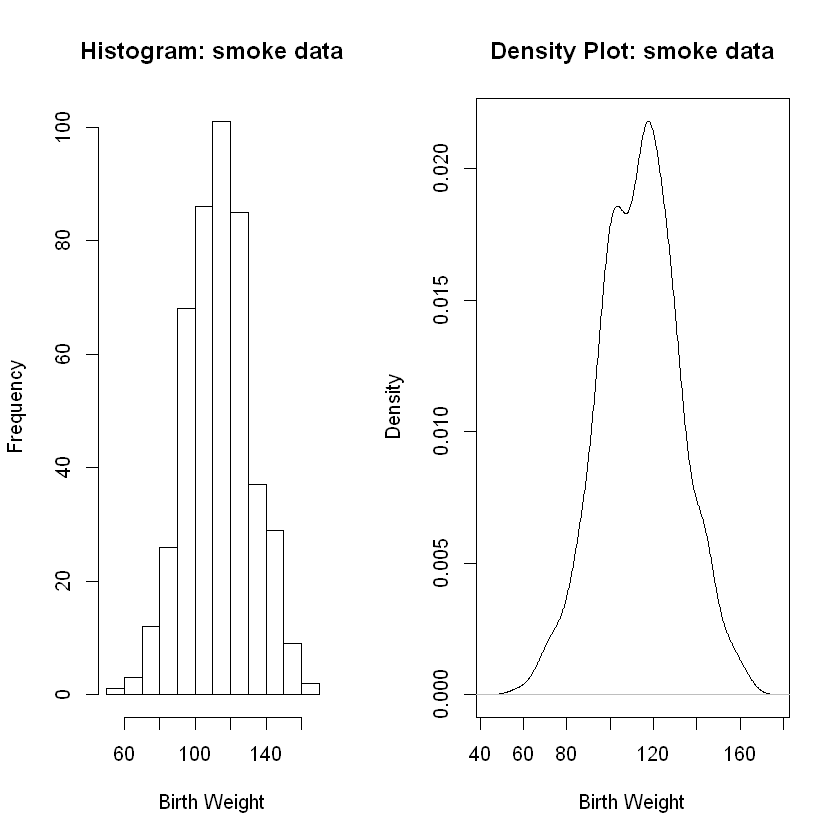

In [15]:
layout(matrix(c(1,2), ncol = 2), lcm(8))
    hist(smoke, main = 'Histogram: smoke data', xlab = 'Birth Weight')
plt <- {
    plot(density(smoke), main = 'Density Plot: smoke data', xlab = 'Birth Weight')
 }

**Analysis.** Again, we see clear evidence of an approximately normal distribution in both graphs along with the presence of a very slight skew to the left.

### Overall Analysis of Birth Weight Data for Smoking Moms

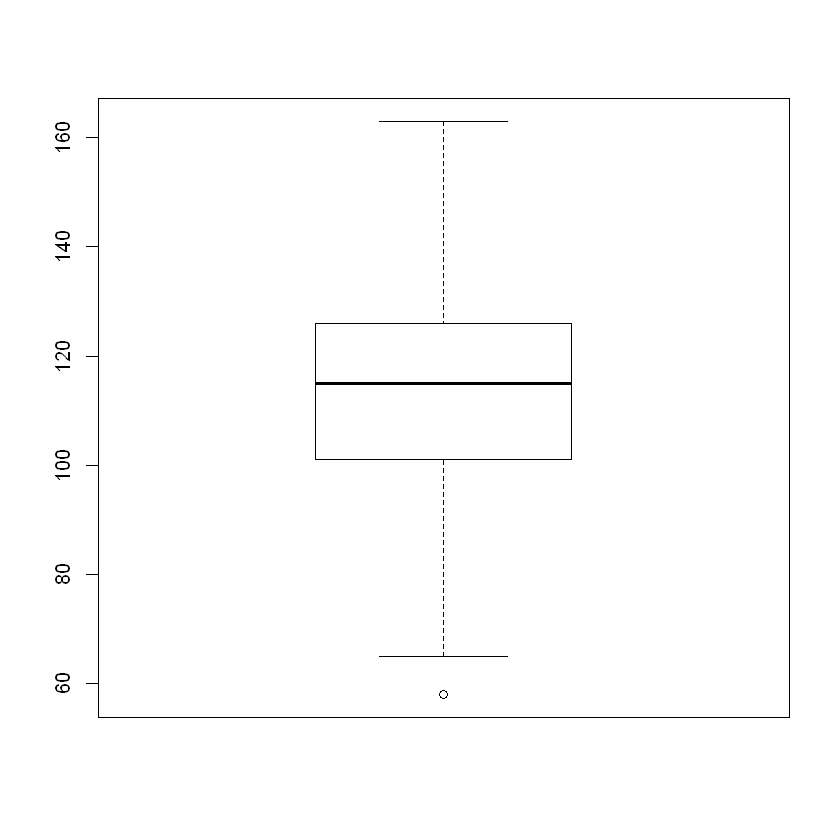

In [16]:
boxplot(smoke)

**Overall Analysis.** We have an approximately normal distribution which is approximately symmetric. We also observe a tiny bit of skew to the left.